# 8장. 텍스트빈도분석 - 2) 한글 단어 분석 

## 한글 단어 분석을 위한 패키지 준비

In [ ]:
!pip install konlpy

In [13]:
import json
import re

from konlpy.tag import Okt

from collections import Counter

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from wordcloud import WordCloud

# 1. 데이터 준비

### 1-1. 파일 읽기

In [ ]:
inputFileName = 'etnews'
data = json.loads(open(inputFileName+'.json', 'r', encoding='utf-8').read())
data #출력하여 내용 확인

### 1-2. 분석할 데이터 추출

In [ ]:
message = ''

for item in data:
    if 'message' in item.keys(): 
        message = message + re.sub(r'[^\w]', ' ', item['message']) +''
        
message #출력하여 내용 확인

### 1-3. 품사 태깅 : 명사 추출

In [ ]:
nlp = Okt()
message_N = nlp.nouns(message)
message_N   #출력하여 내용 확인

## 2. 데이터 탐색

### 2-1. 단어 빈도 탐색

In [ ]:
count = Counter(message_N)

count   #출력하여 내용 확인

In [ ]:
word_count = dict()

for tag, counts in count.most_common(80):
    if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))

### 히스토그램

In [15]:
# Matplotlib에서 한글을 사용하기 위한 셋팅 

!apt-get update -qq
!apt-get install fonts-nanum* -qq
%matplotlib inline  

import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도
fontpath = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

NanumGothic Eco


In [ ]:
plt.figure(figsize=(25,10))
plt.xlabel('키워드')
plt.ylabel('빈도수')
plt.grid(True)

sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)

plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation='75')

plt.show()

### 워드클라우드

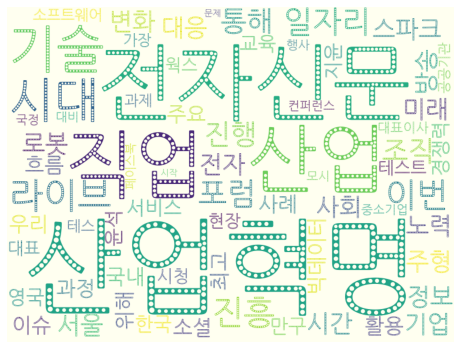

In [18]:
wc = WordCloud(fontpath, background_color='ivory', width=800, height=600)
cloud=wc.generate_from_frequencies(word_count)

plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [19]:
cloud.to_file(inputFileName + '_cloud.jpg')